#### Libraries

In [32]:

%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('autosavetime/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

from sklearn.metrics import roc_auc_score

In [34]:
def plot_feature_importance(
    columnas, model_features, columns_ploted=10, model_name="Catboost"
):
    """
    This method is yet non-tested
    
    This function receives a set of columns feeded to a model, and the importance of each of feature.
    Returns a graphical visualization
    
    Call it fot catboost pipe example:
    plot_feature_importance(pipe_best_estimator[:-1].transform(X_tr).columns,pipe_best_estimator.named_steps['cb'].get_feature_importance(),20)
    
    Call it for lasso pipe example:
    plot_feature_importance(pipe_best_estimator[:-1].transform(X_tr).columns,np.array(pipe_best_estimator.named_steps['clf'].coef_.squeeze()),20)
    """

    feature_importance = pd.Series(index=columnas, data=np.abs(model_features))
    n_selected_features = (feature_importance > 0).sum()
    print(
        "{0:d} features, reduction of {1:2.2f}%".format(
            n_selected_features,
            (1 - n_selected_features / len(feature_importance)) * 100,
        )
    )
    plt.figure()
    feature_importance.sort_values().tail(columns_ploted).plot(
        kind="bar", figsize=(18, 6)
    )
    plt.title("Feature Importance for {}".format(model_name))
    plt.show()

In [35]:
!ls

Base.ipynb                  datathon_metrics.ipynb
LICENSE                     eda
NN_files                    models
README.md                   output
Untitled.ipynb              pre-datathon
Untitled1.ipynb             submission_instructions.pdf
catboost_info               submissions
data                        test_split.csv
datathon_metrics.R          tools


## Joins

### Generic

In [209]:
generic = pd.read_csv('gx_num_generics.csv').drop(columns='Unnamed: 0')
generic.head(1)

,country,brand,num_generics
0,country_1,brand_3,3


### Package

In [158]:
package = pd.read_csv('gx_package.csv').drop(columns='Unnamed: 0')
package.head()

,country,brand,presentation
0,country_1,brand_3,PILL
1,country_1,brand_4,PILL
2,country_1,brand_10,PILL
3,country_1,brand_14,PILL
4,country_1,brand_18,CREAM


In [159]:
package.presentation.unique()

array(['PILL', 'CREAM', 'INJECTION', 'OTHER', 'PATCH', 'EYE_DROP',
       'INHALER'], dtype=object)

In [160]:
package.country.nunique()

16

In [161]:
package.brand.nunique()

484

In [162]:
package.brand.value_counts()

brand_187    13
brand_477    10
brand_133     9
brand_167     9
brand_47      8
             ..
brand_11      1
brand_209     1
brand_208     1
brand_204     1
brand_148     1
Name: brand, Length: 484, dtype: int64

### Panel

In [163]:
panel = pd.read_csv('gx_panel.csv').drop(columns='Unnamed: 0')

panel.head(2)

,country,brand,channel,channel_rate
0,country_1,brand_3,B,1.189704
1,country_1,brand_3,D,98.810296


In [164]:
panel.brand.nunique()

484

In [165]:
panel.channel.unique()

array(['B', 'D', 'C', 'A'], dtype=object)

### Therapeutic

In [166]:
therapeutic_area = pd.read_csv('gx_therapeutic_area.csv').drop(columns='Unnamed: 0')
therapeutic_area.head(1)

,brand,therapeutic_area
0,brand_1,Nervous_system


In [167]:
therapeutic_area.therapeutic_area.nunique()

14

### Volume

In [168]:
volume = pd.read_csv('gx_volume.csv').drop(columns='Unnamed: 0')
volume.head(1)

,country,brand,volume,month_num,month_name
0,country_1,brand_3,18509088.6,-88,Jul


In [169]:
volume[(volume.country=='country_1') & (volume.brand=='brand_3')]

,country,brand,volume,month_num,month_name
0,country_1,brand_3,18509088.6,-88,Jul
1,country_1,brand_3,19697508.0,-87,Aug
2,country_1,brand_3,18315721.8,-86,Sep
3,country_1,brand_3,19831199.4,-85,Oct
4,country_1,brand_3,18593281.8,-84,Nov
...,...,...,...,...,...
107,country_1,brand_3,2233432.8,19,Jun
108,country_1,brand_3,2317163.4,20,Jul
109,country_1,brand_3,2290332.6,21,Aug
110,country_1,brand_3,2529034.2,22,Sep


### Subm

In [170]:
subm = pd.read_csv('submission_template.csv')
subm

,country,brand,month_num,pred_95_low,prediction,pred_95_high
0,country_1,brand_121,0,NaN,NaN,NaN
1,country_1,brand_121,1,NaN,NaN,NaN
2,country_1,brand_121,2,NaN,NaN,NaN
3,country_1,brand_121,3,NaN,NaN,NaN
4,country_1,brand_121,4,NaN,NaN,NaN
...,...,...,...,...,...,...
4579,country_9,brand_187,19,NaN,NaN,NaN
4580,country_9,brand_187,20,NaN,NaN,NaN
4581,country_9,brand_187,21,NaN,NaN,NaN
4582,country_9,brand_187,22,NaN,NaN,NaN


In [171]:
pd.merge(volume, subm,left_on=['country','brand','month_num'], right_on = ['country','brand','month_num'])

,country,brand,volume,month_num,month_name,pred_95_low,prediction,pred_95_high
0,country_1,brand_121,3.327128e+07,0,Jun,NaN,NaN,NaN
1,country_1,brand_121,1.276786e+07,1,Jul,NaN,NaN,NaN
2,country_1,brand_121,7.870697e+06,2,Aug,NaN,NaN,NaN
3,country_1,brand_121,6.978249e+06,3,Sep,NaN,NaN,NaN
4,country_1,brand_121,7.223489e+06,4,Oct,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
589,country_8,brand_70,2.698856e+08,0,Oct,NaN,NaN,NaN
590,country_8,brand_70,2.491100e+08,1,Nov,NaN,NaN,NaN
591,country_8,brand_70,3.027820e+08,2,Dec,NaN,NaN,NaN
592,country_8,brand_70,1.983534e+08,3,Jan,NaN,NaN,NaN


In [172]:
594/4584

0.12958115183246074

## Full

In [211]:
volume

,country,brand,volume,month_num,month_name
0,country_1,brand_3,18509088.60,-88,Jul
1,country_1,brand_3,19697508.00,-87,Aug
2,country_1,brand_3,18315721.80,-86,Sep
3,country_1,brand_3,19831199.40,-85,Oct
4,country_1,brand_3,18593281.80,-84,Nov
...,...,...,...,...,...
94949,country_16,brand_484,2228935.30,-5,Feb
94950,country_16,brand_484,2716993.72,-4,Mar
94951,country_16,brand_484,2018832.66,-3,Apr
94952,country_16,brand_484,1997465.68,-2,May


In [212]:
generic

,country,brand,num_generics
0,country_1,brand_3,3
1,country_1,brand_4,1
2,country_1,brand_10,6
3,country_1,brand_14,1
4,country_1,brand_18,1
...,...,...,...
1073,country_16,brand_477,1
1074,country_16,brand_478,1
1075,country_16,brand_481,1
1076,country_16,brand_483,1


In [214]:
a = pd.merge(volume, generic,how='left',left_on=['country','brand'], right_on = ['country','brand'])

In [220]:
full = pd.merge(volume, generic,how='left',left_on=['country','brand'], right_on = ['country','brand'])


# package 
full = pd.merge(full, package,how='left',left_on=['country','brand'], right_on = ['country','brand'])
full

,country,brand,volume,month_num,month_name,num_generics,presentation
0,country_1,brand_3,18509088.60,-88,Jul,3,PILL
1,country_1,brand_3,19697508.00,-87,Aug,3,PILL
2,country_1,brand_3,18315721.80,-86,Sep,3,PILL
3,country_1,brand_3,19831199.40,-85,Oct,3,PILL
4,country_1,brand_3,18593281.80,-84,Nov,3,PILL
...,...,...,...,...,...,...,...
94949,country_16,brand_484,2228935.30,-5,Feb,1,OTHER
94950,country_16,brand_484,2716993.72,-4,Mar,1,OTHER
94951,country_16,brand_484,2018832.66,-3,Apr,1,OTHER
94952,country_16,brand_484,1997465.68,-2,May,1,OTHER


In [232]:
panel

,country,brand,channel,channel_rate
0,country_1,brand_3,B,1.189704
1,country_1,brand_3,D,98.810296
2,country_1,brand_4,B,0.090229
3,country_1,brand_4,D,99.909771
4,country_1,brand_10,B,1.015697
...,...,...,...,...
2366,country_16,brand_483,C,1.637647
2367,country_16,brand_483,D,96.945568
2368,country_16,brand_484,B,48.216226
2369,country_16,brand_484,C,2.557450


In [236]:
panel.groupby(['country', 'brand','channel'], as_index=False).agg(['min', 'max','sum','mean','median'])

channel_rate                                      \
                                     min         max         sum        mean   
country   brand     channel                                                    
country_1 brand_10  B           1.015697    1.015697    1.015697    1.015697   
                    D          98.984303   98.984303   98.984303   98.984303   
          brand_102 B           0.109766    0.109766    0.109766    0.109766   
                    D          99.890234   99.890234   99.890234   99.890234   
          brand_115 B           1.992728    1.992728    1.992728    1.992728   
...                                  ...         ...         ...         ...   
country_9 brand_167 B          26.524011   26.524011   26.524011   26.524011   
                    C          73.475989   73.475989   73.475989   73.475989   
          brand_187 B         100.000000  100.000000  100.000000  100.000000   
          brand_477 B           6.811816    6.811816    6.811816    6.811816   
                    C          93.188184   93.188184   93.188184   93.188184   

                                         
                                 median  
country   brand     channel              
country_1 brand_10  B          1.015697  
                    D         98.984303  
          brand_102 B          0.109766  
                    D         99.890234  
          brand_115 B          1.992728  
...                                 ...  
country_9 brand_167 B         26.524011  
                    C         73.475989  
          brand_187 B        100.000000  
          brand_477 B          6.811816  
                    C         93.188184  

[2371 rows x 5 columns]

In [217]:
full

,country,brand,volume,month_num,month_name,num_generics,presentation
0,country_1,brand_3,18509088.60,-88,Jul,3,PILL
1,country_1,brand_3,19697508.00,-87,Aug,3,PILL
2,country_1,brand_3,18315721.80,-86,Sep,3,PILL
3,country_1,brand_3,19831199.40,-85,Oct,3,PILL
4,country_1,brand_3,18593281.80,-84,Nov,3,PILL
...,...,...,...,...,...,...,...
94949,country_16,brand_484,2228935.30,-5,Feb,1,OTHER
94950,country_16,brand_484,2716993.72,-4,Mar,1,OTHER
94951,country_16,brand_484,2018832.66,-3,Apr,1,OTHER
94952,country_16,brand_484,1997465.68,-2,May,1,OTHER


In [224]:
# generic
full = pd.merge(volume, generic,how='left',left_on=['country','brand'], right_on = ['country','brand'])


# package 
full = pd.merge(full, package,how='left',left_on=['country','brand'], right_on = ['country','brand'])

# panel
full = pd.merge(full, panel, how='left',left_on=['country','brand'], right_on = ['country','brand'])
full.shape

(207765, 9)

In [173]:
# generic
full = pd.merge(volume, generic,how='left',left_on=['country','brand'], right_on = ['country','brand'])


# package 
full = pd.merge(full, package,how='left',left_on=['country','brand'], right_on = ['country','brand'])

# panel
full = pd.merge(full, panel, how='left',left_on=['country','brand'], right_on = ['country','brand'])

# therapeutic
full = pd.merge(full, therapeutic_area,how='left',left_on=['brand'], right_on = ['brand'])
full.head(1)

,country,brand,volume,month_num,month_name,num_generics,presentation,channel,channel_rate,therapeutic_area
0,country_1,brand_3,18509088.6,-88,Jul,3,PILL,B,1.189704,Cardiovascular_Metabolic


In [174]:
full.shape

(207765, 10)

## Adversarial Trainning

In [175]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from category_encoders.m_estimate import MEstimateEncoder

In [310]:
adv = pd.read_csv('data/gx_merged.csv')
adv = adv.drop(columns=['month_name','volume',
                        #'brand','B','C','D','num_generics'
                       ])

In [311]:
adv['random'] = np.random.random(adv.shape[0])

In [312]:
me = MEstimateEncoder()

In [313]:
X = adv.drop(columns=['test'])
y = adv.test

In [314]:
X = me.fit_transform(X,y)

/opt/anaconda3/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [315]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [316]:
cb = CatBoostClassifier(iterations=100,verbose=0)
cb.fit(X_train,y_train)

10 features, reduction of 9.09%


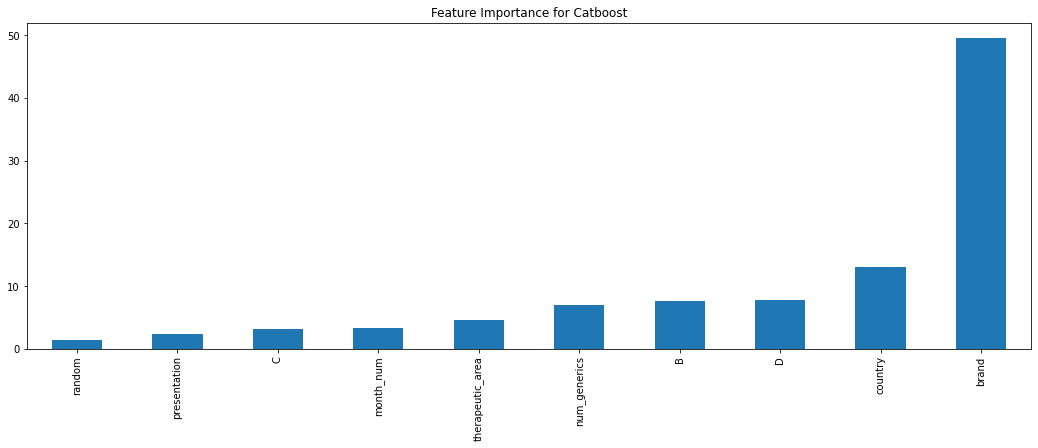

In [317]:
plot_feature_importance(X.columns,cb.get_feature_importance())

In [318]:
roc_auc_score(y_test,cb.predict(X_test))

0.9540375847924777

In [319]:
X.columns

Index(['country', 'brand', 'month_num', 'num_generics', 'therapeutic_area',
       'presentation', 'B', 'D', 'C', 'A', 'random'],
      dtype='object')

In [320]:

adv

,country,brand,month_num,test,num_generics,therapeutic_area,presentation,B,D,C,A,random
0,country_1,brand_3,0,0,3,Cardiovascular_Metabolic,PILL,1.189704,98.810296,0.0,0,0.127658
1,country_1,brand_3,1,0,3,Cardiovascular_Metabolic,PILL,1.189704,98.810296,0.0,0,0.754429
2,country_1,brand_3,2,0,3,Cardiovascular_Metabolic,PILL,1.189704,98.810296,0.0,0,0.905608
3,country_1,brand_3,3,0,3,Cardiovascular_Metabolic,PILL,1.189704,98.810296,0.0,0,0.739566
4,country_1,brand_3,4,0,3,Cardiovascular_Metabolic,PILL,1.189704,98.810296,0.0,0,0.978756
...,...,...,...,...,...,...,...,...,...,...,...,...
25307,country_9,brand_187,19,1,1,Antineoplastic_and_immunology,PILL,100.000000,0.000000,0.0,0,0.713975
25308,country_9,brand_187,20,1,1,Antineoplastic_and_immunology,PILL,100.000000,0.000000,0.0,0,0.659026
25309,country_9,brand_187,21,1,1,Antineoplastic_and_immunology,PILL,100.000000,0.000000,0.0,0,0.140628
25310,country_9,brand_187,22,1,1,Antineoplastic_and_immunology,PILL,100.000000,0.000000,0.0,0,0.394381


## Splitting

In [5]:
df = pd.read_csv('data/gx_merged.csv')

# Take out test
df = df[df.test==0]

# Create our unique index variable
df['count_brand'] = df["country"].astype(str) + '-'+ df["brand"]

# Unique index
lista = df['count_brand'].unique()
df['count_brand'].nunique()

982

In [6]:
# Get the ones that have not 24months
a = pd.DataFrame(df.groupby(["country", "brand"]).month_num.max()).reset_index()
a = a[a.month_num < 23]
a["count_brand"] = a["country"].astype(str) + "-" + a["brand"]
deformed = a.count_brand.unique()

In [7]:
buenos = list(set(lista) - set(list(deformed)))

In [8]:
split = int(len(buenos)*0.75)
split_train_list = buenos[:split]
split_valid_list = buenos[split:]


In [9]:
len(split_train_list)

576

In [10]:
len(split_valid_list)

192

In [11]:
train_split = df[df['count_brand'].isin(split_train_list)]
valid_split = df[df['count_brand'].isin(split_valid_list)]

train_split = train_split[['country','brand']]
valid_split = valid_split[['country','brand']]

train_split.shape

train_split.drop_duplicates().to_csv('data/train_split_noerror.csv',index=False)
valid_split.drop_duplicates().to_csv('data/valid_split.csv',index=False)

In [12]:
split_train_split_deformed = list(set((split_train_list + list(deformed))))

In [13]:
train_split = df[df['count_brand'].isin(split_train_split_deformed)]


train_split = train_split[['country','brand']]



train_split.drop_duplicates().to_csv('data/train_split.csv',index=False)


In [14]:
576/768

0.75

In [15]:
len(buenos)

768

In [15]:
pd.read_csv('data/train_split.csv').shape

(790, 2)

In [16]:
pd.read_csv('data/valid_split.csv').shape

(192, 2)

In [17]:
pd.read_csv('data/train_split_noerror.csv').shape

(576, 2)

### Split test

In [36]:
df = pd.read_csv('data/gx_merged.csv')

# Take out test
df = df[df.test==1]

# Create our unique index variable
df['count_brand'] = df["country"].astype(str) + '-'+ df["brand"]

# Unique index
lista = df['count_brand'].unique()
df['count_brand'].nunique()

191

In [37]:
split_test_list = lista 

In [38]:
test_split = df[df['count_brand'].isin(split_test_list)]

test_split = test_split[['country','brand']]

In [39]:
test_split.drop_duplicates().to_csv('data/test_split.csv',index=False)